In [1]:
import numpy as np
import torch
import torch.nn as nn

In [2]:
sample = " if you want me"

char_set = set(sample)
input_size = len(char_set)
char_dict = {c: i for i, c in enumerate(char_set)}
X = torch.Tensor(np.array([np.eye(input_size)[char_dict[c]] for c in sample[:-1]])).unsqueeze(0)
y = torch.LongTensor([[char_dict[c] for c in sample[1:]]]) # CrossEntropyLoss 계산시 정답 클래스 레이블은 정수형 자료여야 한다

In [3]:
model = nn.RNN(input_size=input_size, hidden_size=input_size, batch_first=True)

In [4]:
with torch.no_grad():
    answer = sample[0]
    pred, _state = model(X)
    pred = torch.argmax(pred, dim=2).squeeze()
    for i in pred:
        for c in char_set:
            if char_dict[c] == i:
                answer += c
    
    print(answer)

 iiiiiiiiiii in


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_loss_list = []
for _ in range(1000):
    optimizer.zero_grad()
    pred, _state = model(X)
    loss = criterion(pred.view(-1, input_size), y.view(-1))
    train_loss_list.append(loss.item())
    loss.backward()
    optimizer.step()
    
with torch.no_grad():
    answer = sample[0]
    pred, _state = model(X)
    pred = torch.argmax(pred, dim=2).squeeze()
    for i in pred:
        for c in char_set:
            if char_dict[c] == i:
                answer += c
    
    print(answer)

 if you want me


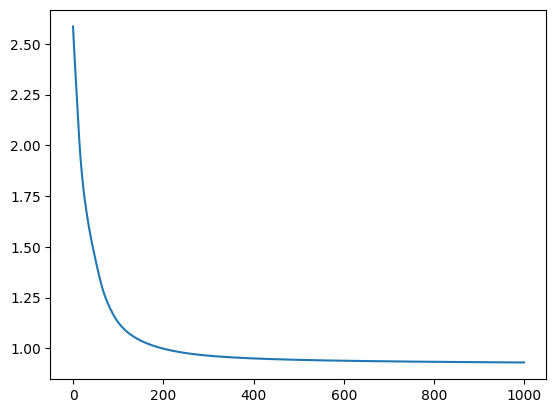

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train_loss_list)